<font size="5"><b>The Adult Income dataset</font></b>

**Description**

Title of dataset: adult.csv

**Sources:**

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

**Number of Instances**

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

**Number of Attributes/Fearures/Columns**

* 6 continuous, 8 nominal attributes. 

**Attribute Information/Fearures/Columns**

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    
**Missing Attribute Values:**

7% have missing values.

**Class Distribution:**

*Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
    
*Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
    
**Notes for Delve**

*One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.

*Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.

*The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

<b><font size=5> Loading the data</b></font>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('adult.csv')
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
<b><font size=5> Observations </b></font>

In [42]:
df.shape
print('no. of rows:',df.shape[0])
print('no. of columns:',df.shape[1])

no. of rows: 48842
no. of columns: 15


In this we can observe that the rows are 48842 and columns are 15. Also it contains missing values.

In [43]:
#to find the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [44]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [45]:
missing_value = ['?']
df_new = pd.read_csv('adult.csv', na_values = missing_value)
df_new.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [47]:
df_new.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
df_new.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

We can easily observe from above data that the missing values are from **workckass** , **occupation** and from **native-country**

In [55]:
df.loc[df.occupation=='?','native-country']

4        United-States
6        United-States
13       United-States
22       United-States
35       United-States
             ...      
48811    United-States
48812    United-States
48820    United-States
48822    United-States
48823    United-States
Name: native-country, Length: 2809, dtype: object

In [56]:
df.loc[df.workclass=='?','occupation']

4        ?
6        ?
13       ?
22       ?
35       ?
        ..
48811    ?
48812    ?
48820    ?
48822    ?
48823    ?
Name: occupation, Length: 2799, dtype: object

All are missing values.

**For now we are removing the fnlwgt column because we dont need it and also their is no useful data in it**

In [59]:
#removing fnlwgt column
df_new.dropna(axis = 0, how = 'any', inplace = True)
df_new.drop('fnlwgt', axis = 1, inplace = True)

In [61]:
df_new.shape

(45222, 14)

In [66]:
# FInding the percentage of rows that were removed while handling missing values
missing_Percentage_value=(df.shape[0]-df_new.shape[0])/df.shape[0]
print(missing_Percentage_value)

0.07411653904426518


Only .74% rows having missing values.

<b><font size=5> Univariate Analysis of given data </b></font>

In this we are going to show some graphs like PDF, Histograms, Boxplots, Countplots, etc.

Text(0.5, 1.0, 'histogram ')

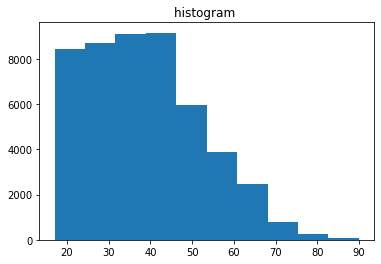

In [69]:
plt.hist(df.age)
plt.title('histogram ')

 In this graph we can observe that most of the data lies in the range of 20-60.

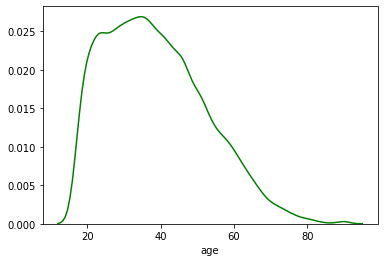

In [71]:
sns.distplot(df['age'],color = 'g',hist = False, kde = True)

In this we can say that the graph is maximun near the age 40 and also outliers lies on the right hand side of the graph.

Text(0.5, 1.0, 'Boxplot')

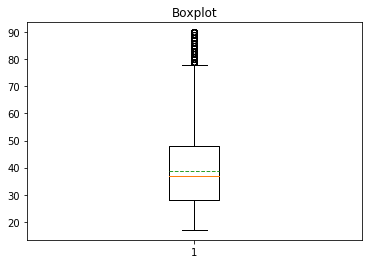

In [76]:
plt.boxplot(df.age , showmeans = True, meanline = True)
plt.title('Boxplot')

From the above plot it is observed that the median of age column is 37 which is shown by the orange line and the mean lies at 39 which is shown by the dotted green line. Also we can observe thet the outliers lies after the age of the 75

{'whiskers': [<matplotlib.lines.Line2D at 0x100c2588>,
 'caps': [<matplotlib.lines.Line2D at 0x100c2d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x100b8f88>],
 'medians': [<matplotlib.lines.Line2D at 0x100c7708>],
 'fliers': [<matplotlib.lines.Line2D at 0x100cc388>],
 'means': [<matplotlib.lines.Line2D at 0x100c7e88>]}

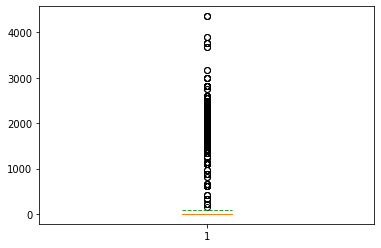

In [82]:
plt.boxplot(df['capital-loss'], showmeans = True, meanline = True)


Text(0.5, 1.0, 'histogram ')

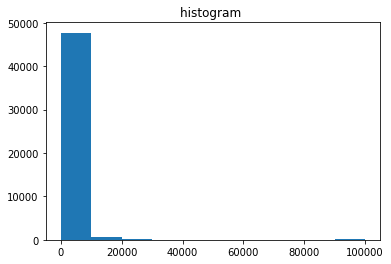

In [84]:
plt.hist(df['capital-gain'])
plt.title('histogram ')

Text(0.5, 1.0, 'histogram ')

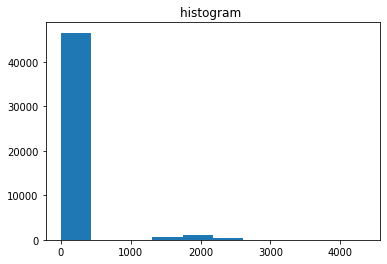

In [85]:
plt.hist(df['capital-loss'])
plt.title('histogram ')

Text(0.5, 1.0, 'countplot for race column')

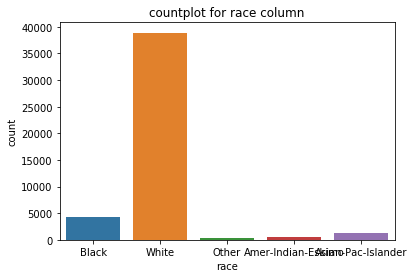

In [86]:
sns.countplot(df_new.race)
plt.title('countplot for race column')

Text(0.5, 1.0, 'countplot for education column')

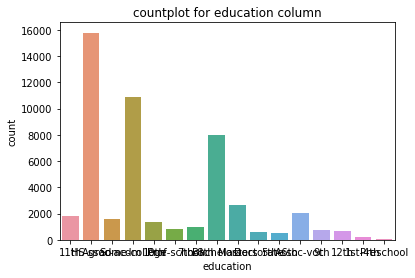

In [90]:
sns.countplot(df.education)
plt.title('countplot for education column')

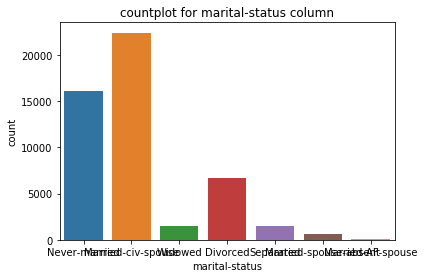

In [93]:
sns.countplot(df['marital-status'])
plt.title('countplot for marital-status column')
plt.show()

<b><font size=5> Bivariate Analysis of given data </b></font>

Bivariate analysis of gender with income using crosstab function. Reference : **geeksforgeeks**

In [94]:
pd.crosstab(df_new.gender, df_new.income, normalize = 'columns')

income,<=50K,>50K
gender,,
Female,0.38296,0.148911
Male,0.61704,0.851089


Bivariate analysis of marital status with income using crosstab function.

In [96]:
pd.crosstab(df_new['marital-status'], df_new['income'], normalize = 'columns')

income,<=50K,>50K
marital-status,,
Divorced,0.165873,0.058440
Married-AF-spouse,0.000529,0.001249
Married-civ-spouse,0.337831,0.853319
Married-spouse-absent,0.014641,0.004818
Never-married,0.408567,0.062545
Separated,0.038572,0.008833
Widowed,0.033986,0.010796


**Scatter plot**

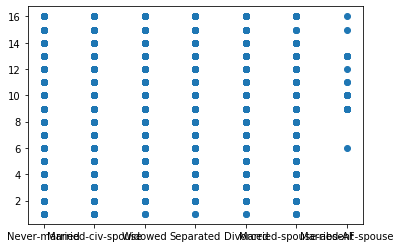

In [97]:
plt.scatter(df_new['marital-status'], df_new['educational-num'])

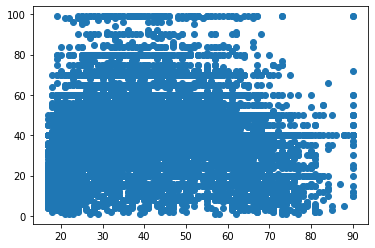

In [98]:
plt.scatter(df_new.age, df_new['hours-per-week'])

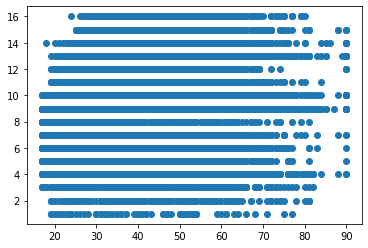

In [99]:
plt.scatter(df_new.age, df_new['educational-num'])

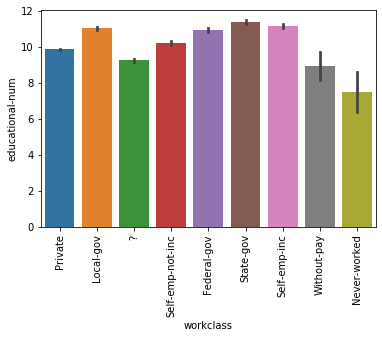

In [100]:
sns.barplot(x = 'workclass', y = 'educational-num',data = df)
plt.xticks(rotation = 90)
plt.show()

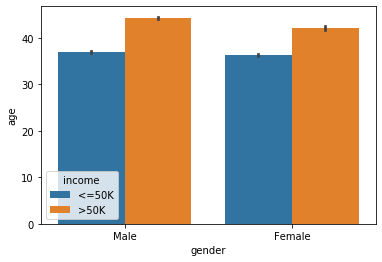

In [101]:
sns.barplot(x = 'gender', y = 'age', hue = 'income', data = df_new)

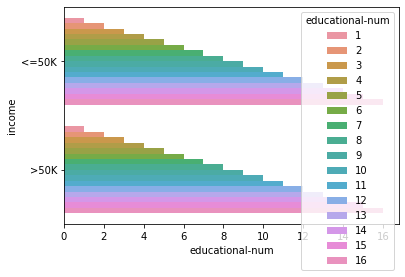

In [107]:
sns.barplot(x = 'educational-num', y = 'income', hue = 'educational-num', data = df_new)

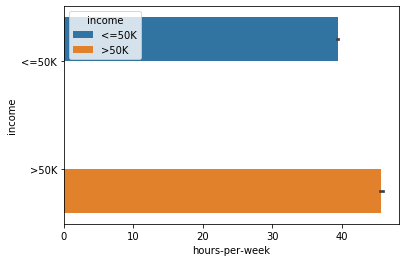

In [106]:
sns.barplot(x = 'hours-per-week', y = 'income', hue = 'income', data = df_new)

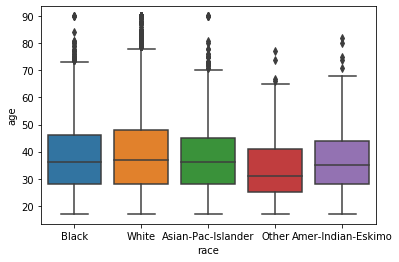

In [110]:
#creating box plot using race and age columns
sns.boxplot(x = 'race', y= 'age', data = df) 

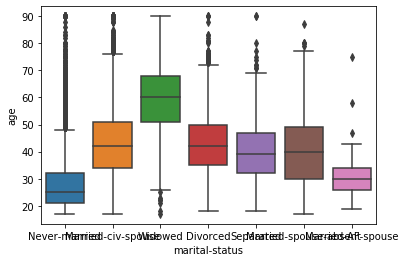

In [111]:
sns.boxplot(x = 'marital-status', y = 'age', data = df)

In the same way we can create boxplot using different columns to get different types of plot  and observations.

<function matplotlib.pyplot.show(*args, **kw)>

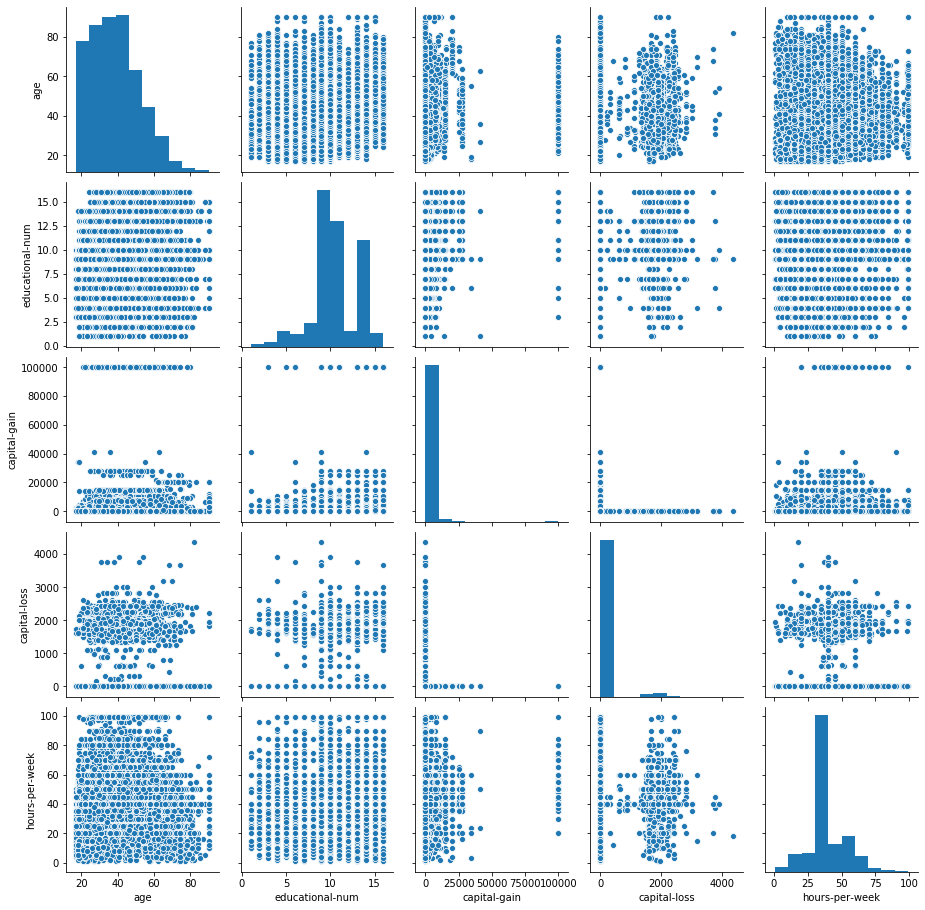

In [112]:
sns.pairplot(df_new)
plt.show

<b> <font size=5> Conclusion </b> </font>

In this assignment we remove missing values, remove those columns which didnt containing some important data like fnlwgt, we create lots of different plots. The plots are boxplot, scatter plot, histplot, histograms, countplot, pair plot etc. Also we do some analysis on the basis of univariate and bivariate analysis. 

<b> <font size = 5> STEP = 7 </b> </font>

In [114]:
#Normalizing
df_new.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [133]:
num=['gender','income','marital-status','occupation','native-country','relationship','education','workclass','race']
data = pd.get_dummies(df_new,columns = num)

In [134]:
data.head(5)

,age,educational-num,capital-gain,capital-loss,hours-per-week,gender_Female,gender_Male,income_<=50K,income_>50K,marital-status_Divorced,...,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,7,0,0,40,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,28,12,0,0,40,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,44,10,7688,0,40,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
given_data = data[['age','educational-num','capital-gain',
       'capital-loss', 'hours-per-week']]


In [138]:
scalar=MinMaxScaler()
scalar.fit(given_data)
output = scalar.transform(given_data)

In [139]:
output

array([[0.10958904, 0.4       , 0.        , 0.        , 0.39795918],
       [0.28767123, 0.53333333, 0.        , 0.        , 0.5       ],
       [0.15068493, 0.73333333, 0.        , 0.        , 0.39795918],
       ...,
       [0.56164384, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.06849315, 0.53333333, 0.        , 0.        , 0.19387755],
       [0.47945205, 0.53333333, 0.1502415 , 0.        , 0.39795918]])

**This step is done with the help of google and with the help of my friends.**